<a href="https://colab.research.google.com/github/kh-ops69/ML_NLP/blob/master/basic_cipher_decrypt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import matplotlib.pyplot as plt
import numpy as np
import os
import requests, textwrap
import string
import random

In [ ]:
!wget nc https://lazyprogrammer.me/course_files/moby_dick.txt

--2023-06-04 04:20:51--  http://nc/
Resolving nc (nc)... failed: No address associated with hostname.
wget: unable to resolve host address ‘nc’
--2023-06-04 04:20:51--  https://lazyprogrammer.me/course_files/moby_dick.txt
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘moby_dick.txt’

moby_dick.txt           [   <=>              ]   1.17M  2.24MB/s    in 0.5s    

2023-06-04 04:20:52 (2.24 MB/s) - ‘moby_dick.txt’ saved [1227649]

FINISHED --2023-06-04 04:20:52--
Total wall clock time: 0.8s
Downloaded: 1 files, 1.2M in 0.5s (2.24 MB/s)


In [ ]:
#@title Default title text
with open('moby_dick.txt', 'r') as file:
  lines_lst = file.readlines()

new_lst = []
for line in lines_lst:
  line = re.sub(',|\n|-|;', '', line)
  if line:
    new_lst.append(line)

new_lst

In [ ]:
#@title Default title text
char_lst = [j for i in new_lst for j in i]
set(char_lst)
letters = [i for i in set(char_lst) if i.isalpha() == True and i.islower()==True]
a = sorted(letters)
print(a)

In [ ]:
#@title Default title text
chars1 = list(string.ascii_lowercase)
ref_chars = list(string.ascii_lowercase)

random.shuffle(ref_chars)          # random is unlike other str function related modules in that where storing result in another variable makes it none type argument
true_map = {}

for key,value in zip(chars1, ref_chars):
  true_map[key] = value

In [ ]:
#@title Default title text
# making a simple language model- we first initialise two matrices- one for getting logs of letters in a word in
# a sentence, and the other for storing the initial letters' logs- since they don't have a previous letter to rely upon.
# we have just used counts of the letters(both 2 in sequence and starting letter as well), 
# and taken their logs beforehand so that we can avoid further issues with small probabilities, or 
# words and letter combinations that are least likely to occur can be eliminated in an easier way.


#markov matrix
letters_matrix = np.ones((26,26))

#initial state distributions- otherwise known as pi matrices
pi = np.zeros(26)

def update_markov(letter1, letter2):
  i = ord(letter1) - 97
  j = ord(letter2) - 97

  letters_matrix[i,j] += 1

def update_pis(initial_letter):
  index = ord(initial_letter) - 97
  pi[index] += 1

def get_probability_matrices(word):
  initial_index = ord(word[0]) - 97
  logp = np.log(pi[initial_index])

  for i in word[1:]:
    next_index = ord(i)-97
    logp += np.log(letters_matrix[initial_index, next_index])
    initial_index = next_index
  return logp

def sentence_indiv_probs(sentence):
  if type(sentence) == str:
    sentence = sentence.split()
  
  logp=0
  for word in sentence:
    logp += get_probability_matrices(word)
  return logp

In [ ]:
#@title Default title text
r = requests.get('https://lazyprogrammer.me/course_files/moby_dick.txt')
with open('moby_dick.txt', 'w') as file:
  file.write(r.content.decode())

In [ ]:
#@title Default title text
# re.compile(arg), here order of arg is important, it compiles a list of letters a-z lower and uppercase
# then strip lines of white space and substitute any character not from the regex list with space
# update the pi and letters_matrix matrices, then find actual probabilities with sum() function


regex = re.compile('[^a-zA-Z]')

for line in open('moby_dick.txt'):
  line = line.rstrip()

  if line:
    line = regex.sub(' ', line)

    tokens = line.lower().split()
    for token in tokens:
      ch0 = token[0]
      update_pis(ch0)

      for ch_next in token[1:]:
        update_markov(ch0, ch_next)
        ch0 = ch_next

pi /= pi.sum()
letters_matrix /= letters_matrix.sum(axis=1, keepdims=True)

In [ ]:
#@title Default title text
### encode a message

# this is a random excerpt from Project Gutenberg's
# The Adventures of Sherlock Holmes, by Arthur Conan Doyle
# https://www.gutenberg.org/ebooks/1661

original_message = '''Away they went, and I was just wondering whether I should not do well
to follow them when up the lane came a neat little landau, the coachman
with his coat only half-buttoned, and his tie under his ear, while all
the tags of his harness were sticking out of the buckles. It hadn't
pulled up before she shot out of the hall door and into it. I only
caught a glimpse of her at the moment, but she was a lovely woman, with
a face that a man might die for.
'''

# My cabby drove fast. I don't think I ever drove faster, but the others
# were there before us. The cab and the landau with their steaming horses
# were in front of the door when I arrived. I paid the man and hurried
# into the church. There was not a soul there save the two whom I had
# followed and a surpliced clergyman, who seemed to be expostulating with
# them. They were all three standing in a knot in front of the altar. I
# lounged up the side aisle like any other idler who has dropped into a
# church. Suddenly, to my surprise, the three at the altar faced round to
# me, and Godfrey Norton came running as hard as he could towards me.

In [ ]:
original_message.split()

In [ ]:
#@title Default title text
def encode_message(message):
  message = message.lower()

  message = regex.sub(' ', message)

  encrypted_message = []
  for letter in message:
    encrypted_ch = letter
    if letter in true_map:
      encrypted_ch = true_map[letter]
    encrypted_message.append(encrypted_ch)
  
  return ''.join(encrypted_message)

encoded = encode_message(original_message)

def decode_message(message, word_map):
  message = message.lower()
  decoded_message = []
  for ch in message:
    decoded_ch = ch
    if ch in word_map:
      decoded_ch = word_map[ch]
    decoded_message.append(decoded_ch)
  
  return ''.join(decoded_message)

In [ ]:
#@title Default title text
# making different ciphers by simply performing a random shuffle n=20 times,
# these ciphers(in the form of lists) will be appended to larger dna_collection 

dna_collection = []
for i in range(20):
  dna = list(string.ascii_lowercase)
  random.shuffle(dna)
  dna_collection.append(dna)

In [ ]:
#@title Default title text
# making swaps in original dna list from the dna_pool mega list

def make_children(dna_pool, n_iterations):
  children = []
  for dna in dna_pool:
    for _ in range(n_iterations):

      copy = dna.copy()
      i = np.random.randint(len(copy))
      j = np.random.randint(len(copy))
      
      temp = dna[i]
      dna[i] = dna[j]
      dna[j] = temp
      children.append(copy)
  return children+dna_pool

In [ ]:
#@title Default title text
for dna in dna_collection:
  print(type(dna))

In [ ]:
#@title Default title text
iterations = 30
scores = np.zeros(iterations)       # initialising a 0 matrix for score of each dna in the dna_pool
best_score = float('-inf')
best_dna = None
best_cipher = None

for i in range(iterations):
  if i>0:                               # simple assumption that first iteration in our dna loop
                                        #  is assumed to be already diverse enough, if that is not accurate then we iterate upon the next dna present inside the dna_pool
    dna_collection = make_children(dna_collection, 3)

  dna_scores = {}
  for dna in dna_collection:
    current_map = {}
    for key,value in zip(chars1, dna):
      current_map[key] = value
    
    decoded_message = decode_message(encoded, current_map)
    score = sentence_indiv_probs(decoded_message)

    dna_scores[' '.join(dna)] = score

    if score>best_score:
      best_score = score
      best_dna = dna               # current dna from the for loop is best dna, the mapping related to this dna is best cipher, and its score will be best
      best_cipher = current_map

  scores[i] = np.mean(list(dna_scores.values()))
  sorted_scores = sorted(dna_scores.items(), key=lambda x:x[1], reverse=True)
  dna_pool = [list(k) for k,v in sorted_scores[:5]]       # selects the best 5 performing dna's for the next iteration 
  
  if i%3 == 0:
    print("iter:", i, "score:", scores[i], "best so far:", best_score)

In [ ]:
letters1 = list(string.ascii_lowercase)
letters2 = list(string.ascii_lowercase)

true_mapping = {}

# shuffle second set of letters
random.shuffle(letters2)

# populate map
for k, v in zip(letters1, letters2):
  true_mapping[k] = v

### the language model

# initialize Markov matrix
M = np.ones((26, 26))

# initial state distribution
pi = np.zeros(26)

# a function to update the Markov matrix
def update_transition(ch1, ch2):
  # ord('a') = 97, ord('b') = 98, ...
  i = ord(ch1) - 97
  j = ord(ch2) - 97
  M[i,j] += 1

# a function to update the initial state distribution
def update_pi(ch):
  i = ord(ch) - 97
  pi[i] += 1

# get the log-probability of a word / token
def get_word_prob(word):
  # print("word:", word)
  i = ord(word[0]) - 97
  logp = np.log(pi[i])

  for ch in word[1:]:
    j = ord(ch) - 97
    logp += np.log(M[i, j]) # update prob
    i = j # update j

  return logp

# get the probability of a sequence of words
def get_sequence_prob(words):
  # if input is a string, split into an array of tokens
  if type(words) == str:
    words = words.split()

  logp = 0
  for word in words:
    logp += get_word_prob(word)
  return logp

### create a markov model based on an English dataset
# is an edit of https://www.gutenberg.org/ebooks/2701
# (I removed the front and back matter)

# download the file
if not os.path.exists('moby_dick.txt'):
  print("Downloading moby dick...")
  r = requests.get('https://lazyprogrammer.me/course_files/moby_dick.txt')
  with open('moby_dick.txt', 'w') as f:
    f.write(r.content.decode())

# for replacing non-alpha characters
regex = re.compile('[^a-zA-Z]')

# load in words
for line in open('moby_dick.txt'):
  line = line.rstrip()

  # there are blank lines in the file
  if line:
    line = regex.sub(' ', line) # replace all non-alpha characters with space

    # split the tokens in the line and lowercase
    tokens = line.lower().split()

    for token in tokens:
      # update the model

      # first letter
      ch0 = token[0]
      update_pi(ch0)

      # other letters
      for ch1 in token[1:]:
        update_transition(ch0, ch1)
        ch0 = ch1

# normalize the probabilities
pi /= pi.sum()
M /= M.sum(axis=1, keepdims=True)

### encode a message

# this is a random excerpt from Project Gutenberg's
# The Adventures of Sherlock Holmes, by Arthur Conan Doyle
# https://www.gutenberg.org/ebooks/1661

# original_message = '''I then lounged down the street and found,
# as I expected, that there was a mews in a lane which runs down
# by one wall of the garden. I lent the ostlers a hand in rubbing
# down their horses, and received in exchange twopence, a glass of
# half-and-half, two fills of shag tobacco, and as much information
# as I could desire about Miss Adler, to say nothing of half a dozen
# other people in the neighbourhood in whom I was not in the least
# interested, but whose biographies I was compelled to listen to.
# '''

# original_message = '''Away they went, and I was just wondering whether I should not do well
# to follow them when up the lane came a neat little landau, the coachman
# with his coat only half-buttoned, and his tie under his ear, while all
# the tags of his harness were sticking out of the buckles. It hadn't
# pulled up before she shot out of the hall door and into it. I only
# caught a glimpse of her at the moment, but she was a lovely woman, with
# a face that a man might die for.'''

original_message = '''My cabby drove fast. I don't think I ever drove faster, but the others
were there before us. The cab and the landau with their steaming horses
were in front of the door when I arrived. I paid the man and hurried
into the church. There was not a soul there save the two whom I had
followed and a surpliced clergyman, who seemed to be expostulating with
them. They were all three standing in a knot in front of the altar. I
lounged up the side aisle like any other idler who has dropped into a
church. Suddenly, to my surprise, the three at the altar faced round to
me, and Godfrey Norton came running as hard as he could towards me.'''

# a function to encode a message
def encode_message(msg):
  # downcase
  msg = msg.lower()

  # replace non-alpha characters
  msg = regex.sub(' ', msg)

  # make the encoded message
  coded_msg = []
  for ch in msg:
    coded_ch = ch # could just be a space
    if ch in true_mapping:
      coded_ch = true_mapping[ch]
    coded_msg.append(coded_ch)

  return ''.join(coded_msg)


encoded_message = encode_message(original_message)


# a function to decode a message
def decode_message(msg, word_map):
  decoded_msg = []
  for ch in msg:
    decoded_ch = ch # could just be a space
    if ch in word_map:
      decoded_ch = word_map[ch]
    decoded_msg.append(decoded_ch)

  return ''.join(decoded_msg)

### run an evolutionary algorithm to decode the message

# this is our initialization point
dna_pool = []
for _ in range(20):
  dna = list(string.ascii_lowercase)
  random.shuffle(dna)
  dna_pool.append(dna)

def evolve_offspring(dna_pool, n_children):
  # make n_children per offspring
  offspring = []

  for dna in dna_pool:
    for _ in range(n_children):
      copy = dna.copy()
      j = np.random.randint(len(copy))
      k = np.random.randint(len(copy))

      # switch
      tmp = copy[j]
      copy[j] = copy[k]
      copy[k] = tmp
      offspring.append(copy)

  return offspring + dna_pool

num_iters = 1000
scores = np.zeros(num_iters)
best_dna = None
best_map = None
best_score = float('-inf')
for i in range(num_iters):
  if i > 0:
    # get offspring from the current dna pool
    dna_pool = evolve_offspring(dna_pool, 3)

  # calculate score for each dna
  dna2score = {}
  for dna in dna_pool:
    # populate map
    current_map = {}
    for k, v in zip(letters1, dna):
      current_map[k] = v

    decoded_message = decode_message(encoded_message, current_map)
    score = get_sequence_prob(decoded_message)

    # store it
    # needs to be a string to be a dict key
    dna2score[''.join(dna)] = score

    # record the best so far
    if score > best_score:
      best_dna = dna
      best_map = current_map
      best_score = score

  # average score for this generation
  scores[i] = np.mean(list(dna2score.values()))

  # keep the best 5 dna
  # also turn them back into list of single chars
  sorted_dna = sorted(dna2score.items(), key=lambda x: x[1], reverse=True)
  dna_pool = [list(k) for k, v in sorted_dna[:5]]

  if i % 200 == 0:
    print("iter:", i, "score:", scores[i], "best so far:", best_score)

iter: 0 score: -2602.2068465720376 best so far: -2274.2969087772804
iter: 200 score: -1410.1644399319462 best so far: -1256.9620866382402
iter: 400 score: -1225.7660352796938 best so far: -1127.1983612828706
iter: 600 score: -1271.7687190791414 best so far: -1127.1983612828706
iter: 800 score: -1275.727730377133 best so far: -1127.1983612828706


In [ ]:
# print the final decoded message
print("Decoded message:\n", textwrap.fill(decoded_message))

print("\nTrue message:\n", original_message)

Decoded message:
 my cabby drove fast  i don t think i ever drove faster  but the others
were there before us  the cab and the landau with their steaming
horses were in front of the door when i arrived  i paid the man and
hurried into the church  there was not a soul there save the two whom
i had followed and a surpliced clergyman  who seemed to be
expostulating with them  they were all three standing in a knot in
front of the altar  i lounged up the side aisle like any other idler
who has dropped into a church  suddenly  to my surprise  the three at
the altar faced round to me  and godfrey norton came running as hard
as he could towards me

True message:
 My cabby drove fast. I don't think I ever drove faster, but the others
were there before us. The cab and the landau with their steaming horses
were in front of the door when I arrived. I paid the man and hurried
into the church. There was not a soul there save the two whom I had
followed and a surpliced clergyman, who seemed to be ex

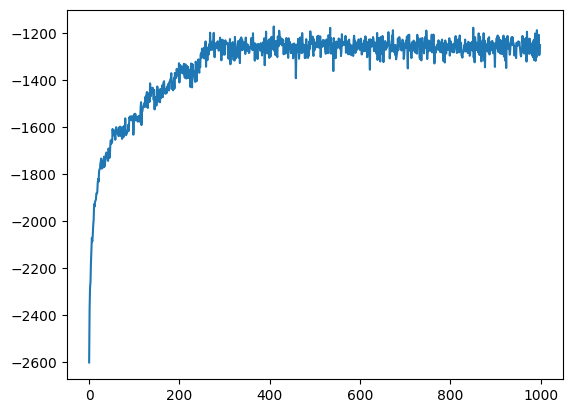

In [ ]:
plt.plot(scores)
plt.show()